In [38]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn import svm
from sklearn import tree

In [2]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


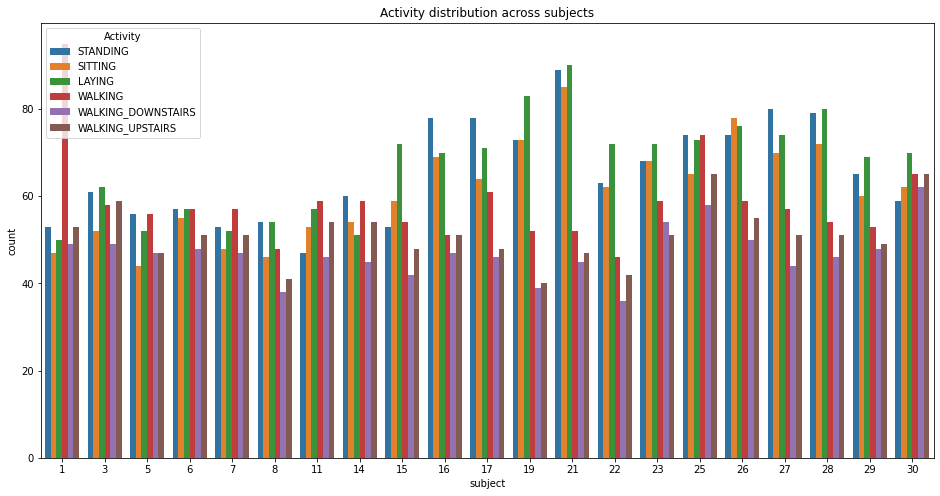

In [70]:
# Data exploration
import seaborn as sns


plt.figure(figsize=(16,8))
sns.countplot(x='subject', hue="Activity", data=train)
plt.title("Activity distribution across subjects")

plt.show()

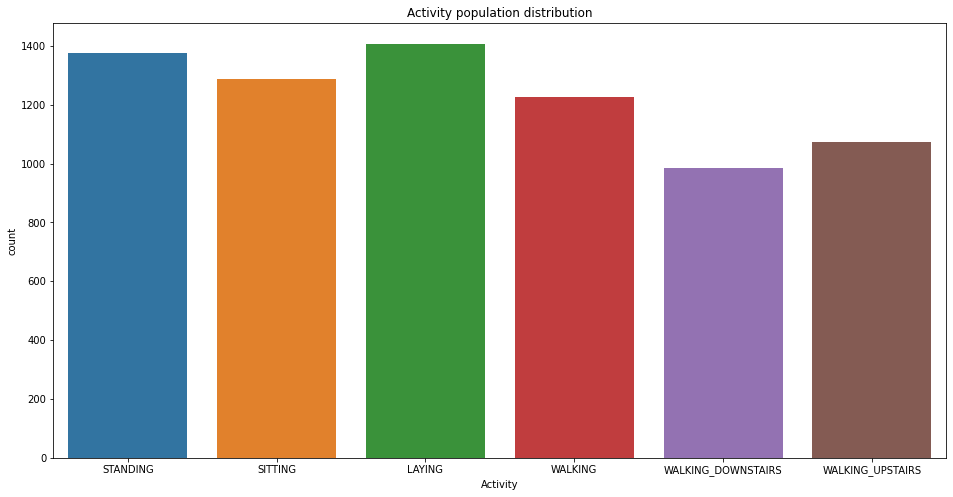

In [71]:
plt.figure(figsize=(16,8))
sns.countplot(x='Activity', data=train)
plt.title("Activity population distribution")
plt.show()

In [78]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

/var/folders/yg/xh1sg6gx0t9dmrk3m0704ppc0000gn/T/ipykernel_41633/2081774963.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
/var/folders/yg/xh1sg6gx0t9dmrk3m0704ppc0000gn/T/ipykernel_41633/2081774963.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
/var/folders/yg/xh1sg6gx0t9dmrk3m0704ppc0000gn/T/ipykernel_41633/2081774963.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

Text(0.5, 1.0, 'Body Acceleration distribution across activities')

<Figure size 1152x576 with 0 Axes>

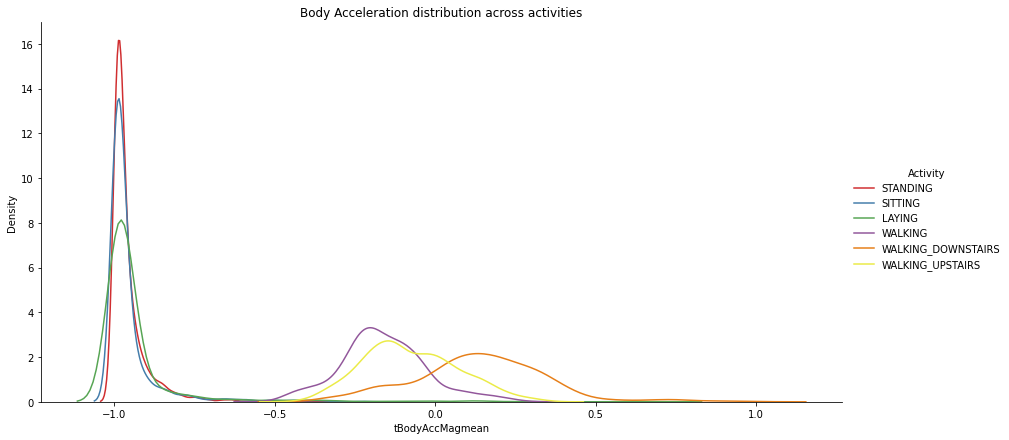

In [79]:
plt.figure(figsize=(16,8))
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.title("Body Acceleration distribution across activities")

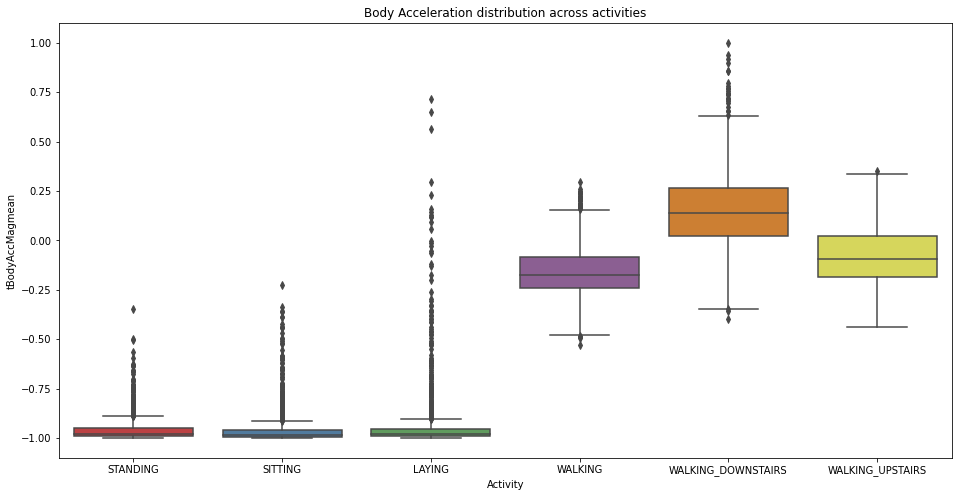

In [80]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Activity", y="tBodyAccMagmean", data=train)
plt.title("Body Acceleration distribution across activities")
plt.show()

         PC1       PC2  Activity
0  15.727224 -7.246259  STANDING
1  15.723317 -7.260690  STANDING
2  15.742570 -7.204006  STANDING
3  15.715666 -7.403807  STANDING
4  15.703153 -7.473707  STANDING


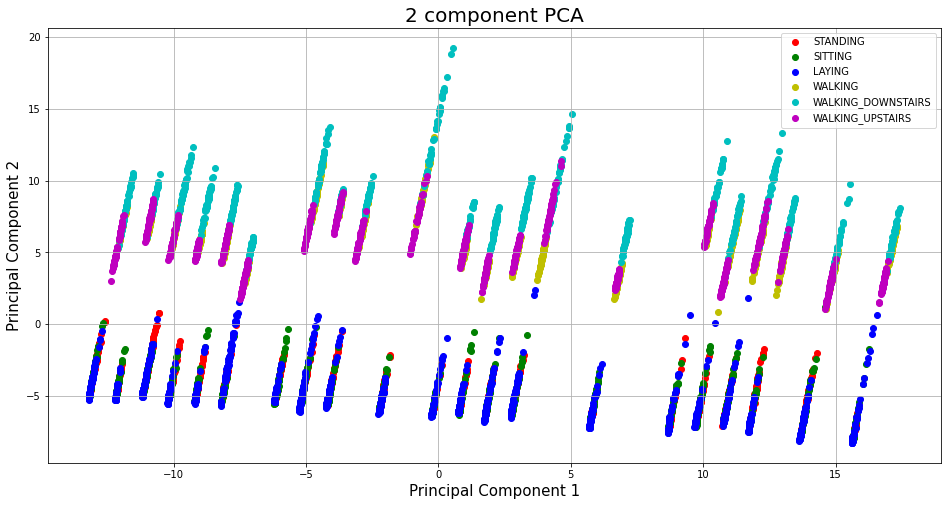

In [89]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(train.drop(["Activity"], axis=1))
pcdf = pd.DataFrame(data=pc, columns=["PC1", "PC2"])

final_pc = pd.concat([pcdf, train["Activity"]], axis=1)
print(final_pc.head())
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(train["Activity"].unique())
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for target, color in zip(targets, colors):
    idx = final_pc["Activity"] == target
    ax.scatter(final_pc.loc[idx, 'PC1'],
                final_pc.loc[idx, 'PC2'],
                c=color)
ax.legend(targets)
ax.grid()


In [4]:
# Prepare data for model
y_train = train["Activity"]
X_train = train.drop(["subject", "Activity"], axis=1)

y_test = test["Activity"]
X_test = test.drop(["subject", "Activity"], axis=1)

print(X_train.shape)
print(X_test.shape)

(7352, 561)
(2947, 561)


In [39]:
class ModelFactory:
    def __init__(self, type) -> None:
        self.type = type
    
    def get_model(self):
        if self.type == "LOG_REG":
            return linear_model.LogisticRegression()
        elif self.type == "LIN_SVC":
            return svm.LinearSVC(tol=0.00005)
        elif self.type == "DEC_TRE":
            return  tree.DecisionTreeClassifier()

In [60]:
class ModelService:

    def __init__(self, model_type:str) -> None:
        model_factory = ModelFactory(model_type)
        self.model = model_factory.get_model()
        return

    def _plot_confusion_matrix(self, matrix, normalize=False):
        if normalize:
            matrix = matrix.astype("float")/matrix.sum(axis=1)[:np.newaxis]
        
        plt.imshow(matrix, interpolation="nearest", cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        return

    def _is_valid(self, data):
        if sum(data.duplicated()):
            print("Duplicates found")
            return False
        
        if data.isnull().values.sum():
            print("Null values found")
            return False

        return True

    def init_grid(self, parameters, cv=3, verbose=1, n_jobs=-1):
        self.model = GridSearchCV(self.model, param_grid=parameters, cv=cv, verbose=verbose, n_jobs=n_jobs)

    def train(self, x_train:pd.DataFrame, y_train:pd.Series):   
        if self._is_valid(x_train):
            print(f"Model training started at {datetime.now()}")
            self.model.fit(x_train, y_train)
            print(f"Model training completed at {datetime.now()}")
            return

    def test(self, x_test:pd.DataFrame, y_test:pd.Series):        
        pred = self.model.predict(x_test)

        # Accuracy
        acc = metrics.accuracy_score(y_test, pred)
        print(f"######## Accuracy = {acc} ########")

        # Confusion matrix
        conf_mat = metrics.confusion_matrix(y_test, pred)
        #print(f"######## Confusion matrix = \n{conf_mat} ########")
        self._plot_confusion_matrix(conf_mat)

        # Classification report
        cr = metrics.classification_report(y_test, pred)
        print(f"######## Classification report = \n{cr} ########")

        return pred

    def get_grid_outputs(self):
        print(f"####### Best Estimator \n{self.model.best_estimator_}\n#######")

        print(f"####### Best parameters \n{self.model.best_params_}\n#######")

        print(f"####### Cross Validation splits \n{self.model.n_splits_}\n#######")

        print(f"####### Best score \n{self.model.best_score_}\n#######")

    

    


Model training started at 2022-10-09 21:48:36.485596
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: Fi

Model training completed at 2022-10-09 21:48:52.057554
######## Accuracy = 0.9582626399728538 ########
######## Classification report = 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947
 ########
####### Best Estimator 
LogisticRegression(C=1)
#######
####### Best parameters 
{'C': 1, 'penalty': 'l2'}
#######
####### Cross Validation splits 
3
#######
####### Best score 
0.9379775574040305
#######


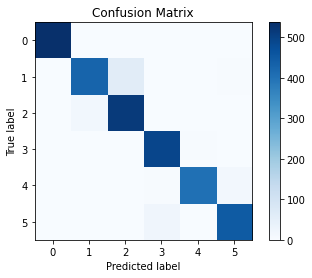

In [61]:
## Logistic Regression with Grid Search
# Grid search parameters
params = {
    "C" : [0.01, 0.1, 1, 10],
    "penalty" : ["l2", "l1"]
}


model_service = ModelService(model_type="LOG_REG")
model_service.init_grid(parameters=params)
model_service.train(x_train=X_train, y_train=y_train)
model_service.test(x_test=X_test, y_test=y_test)
model_service.get_grid_outputs()


Model training started at 2022-10-09 21:35:02.554008
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

Model training completed at 2022-10-09 21:35:21.128767
######## Accuracy = 0.9664065151001018 ########
######## Classification report = 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947
 ########
####### Best Estimator 
LinearSVC(C=5, tol=5e-05)
#######
####### Best parameters 
{'C': 5}
#######
####### Cross Validation splits 
3
#######
####### Best score 
0.9461397680247129
#######


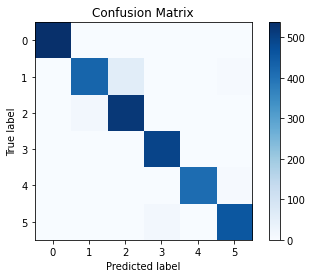

In [45]:
## Linear Support Vector classifier with Grid Search
# Grid search parameters
params = {
    "C" : [0.125, 0.5, 1, 5]
}


model_service = ModelService(model_type="LIN_SVC")
model_service.init_grid(parameters=params)
model_service.train(x_train=X_train, y_train=y_train)
model_service.test(x_test=X_test, y_test=y_test)
model_service.get_grid_outputs()

Model training started at 2022-10-09 21:35:21.408114
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Model training completed at 2022-10-09 21:35:30.710295
######## Accuracy = 0.8642687478791992 ########
######## Classification report = 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.82      0.86       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947
 ########
####### Best Estimator 
DecisionTreeClassifier(max_depth=7)
#######
####### Best parameters 
{'max_depth': 7}
#######
####### Cross Valida

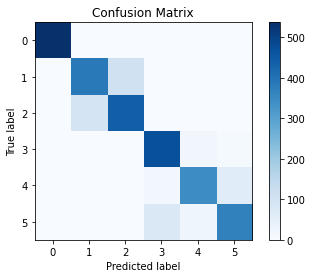

In [46]:
## Decision trees with Grid Search
# Grid search parameters
params = {
    "max_depth" : np.arange(1,10,2)
}


model_service = ModelService(model_type="DEC_TRE")
model_service.init_grid(parameters=params)
model_service.train(x_train=X_train, y_train=y_train)
model_service.test(x_test=X_test, y_test=y_test)
model_service.get_grid_outputs()